<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko). Translated and edited by [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), [Eugene Mashkin](https://www.linkedin.com/in/eugene-mashkin-88490883/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the license [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Free use is permitted for any non-commercial purpose with an obligatory indication of the names of the authors and of the source.

# <center>Assignment #7. Fall 2018
    
## <center> Principal Component Analysis and Clustering

In this assignment, we are going to walk through `sklearn` built-in implementations of dimensionality reduction and clustering methods. Answers should be submitted using [this web-form](https://docs.google.com/forms/d/1Jx0i6fjdDv3ZYBz1kF-TEUDnmfpxJtnQpiU_EVgvfQA/edit).

## 1. Principal Component Analysis

First import all required modules:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.model_selection import train_test_split

Use the given toy data set:

In [2]:
X = np.array([[2., 13.], [1., 3.], [6., 19.],
              [7., 18.], [5., 17.], [4., 9.],
              [5., 22.], [6., 11.], [8., 25.]])

In [3]:
X

array([[ 2., 13.],
       [ 1.,  3.],
       [ 6., 19.],
       [ 7., 18.],
       [ 5., 17.],
       [ 4.,  9.],
       [ 5., 22.],
       [ 6., 11.],
       [ 8., 25.]])

In [4]:
X.shape

(9, 2)

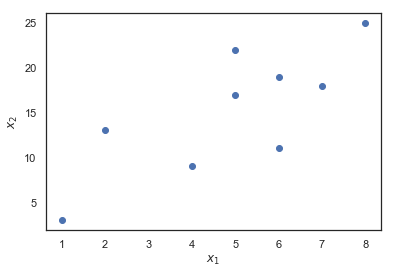

In [5]:
plt.scatter(X[:,0], X[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

#### Question 1. What is the angle between the $x_1$ axis and the vector corresponding to the first principal component for this data (don't forget to rescale the data using StandardScaler)? 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q1__*

- 30 degrees
- 45 degrees
- 60 degrees
- 75 degrees

In [6]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [7]:
X_scaled

array([[-1.35534369, -0.3430981 ],
       [-1.82450112, -1.88703953],
       [ 0.52128604,  0.58326676],
       [ 0.99044347,  0.42887262],
       [ 0.0521286 ,  0.27447848],
       [-0.41702883, -0.96067467],
       [ 0.0521286 ,  1.04644919],
       [ 0.52128604, -0.65188638],
       [ 1.4596009 ,  1.50963162]])

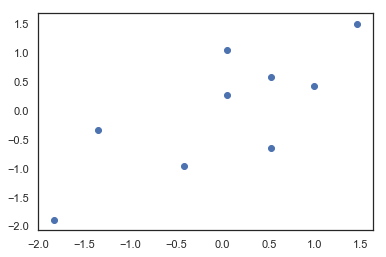

In [8]:
plt.scatter(X_scaled[:,0], X_scaled[:,1]);

In [9]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

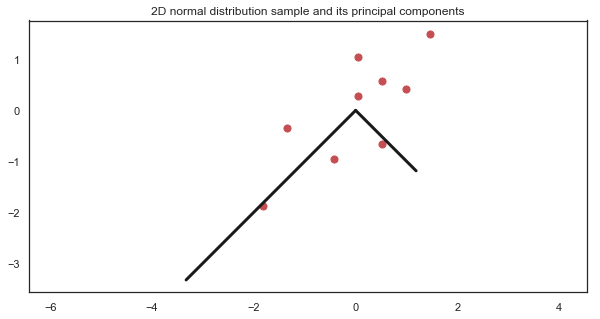

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

In [12]:
print ('1st component: %s' % tuple(pca.explained_variance_ratio_)[0])
print ('2nd component: %s' % tuple(pca.explained_variance_ratio_)[1])

1st component: 0.8872151132459768
2nd component: 0.11278488675402322


In [13]:
# answer (2): 45 degrees

In [14]:
pca.components_[0]

array([-0.70710678, -0.70710678])

In [15]:
x1 = np.array([1,0])

In [16]:
x1

array([1, 0])

In [17]:
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm

#u = array([1.,2,3,4])
#v = ...
#c = dot(u,v)/norm(u)/norm(v) # -> cosine of the angle
#angle = arccos(clip(c, -1, 1))

In [18]:
dot(x1, pca.components_[0])

-0.7071067811865475

In [19]:
norm(x1)

1.0

In [20]:
norm(pca.components_[0])

0.9999999999999999

In [21]:
0.70710678**2 + 0.70710678**2

0.9999999966439369

In [22]:
c = dot(x1, pca.components_[0]) / (norm(x1)*norm(pca.components_[0]))
angle = arccos(clip(c,-1,1))

In [23]:
angle * 180 / 3.14

135.06847396007072

#### Question 2. What are the eigenvalues of the $X^{\text{T}}X$ matrix, given $X$ is a rescaled matrix of the toy dataset?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q2__*

 - 4 and 1.42
 - 16.2 and 2702.8
 - 4.02 and 51.99
 - 15.97 and 2.03

https://en.wikipedia.org/wiki/Principal_component_analysis#Further_considerations

The singular values (in Σ) are the square roots of the eigenvalues of the matrix XTX. Each eigenvalue is proportional to the portion of the "variance" (more correctly of the sum of the squared distances of the points from their multidimensional mean) that is associated with each eigenvector. 

In [24]:
X_scaled

array([[-1.35534369, -0.3430981 ],
       [-1.82450112, -1.88703953],
       [ 0.52128604,  0.58326676],
       [ 0.99044347,  0.42887262],
       [ 0.0521286 ,  0.27447848],
       [-0.41702883, -0.96067467],
       [ 0.0521286 ,  1.04644919],
       [ 0.52128604, -0.65188638],
       [ 1.4596009 ,  1.50963162]])

In [29]:
pca.singular_values_

array([3.99623223, 1.42482559])

In [30]:
pca.singular_values_ ** 2

array([15.96987204,  2.03012796])

In [27]:
from scipy import linalg as LA
val, vecs = LA.eig(X_scaled.T.dot(X_scaled))

In [28]:
val

array([15.96987204+0.j,  2.03012796+0.j])

In [ ]:
# answer (4)  

#### Question 3. What is the meaning of the two numbers from the previous question?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q3__*

- their squares tell what part of the initial data's variance is explained by principal components
- they define a rotation angle between the first principal component and the initial axis
- those numbers tell what part of the initial data's variance is explained by principal components
- the square roots of those numbers define a rotation angle between the first principal component and the initial axis

In [ ]:
# answer (3) - tell what part of the initial data's variance is explained.  (??????)

In [ ]:
the eigenvalues explain the variance of the data along the new feature axes.

Let's load a dataset of peoples' faces and output their names. (This step requires stable, fast internet connection.)

In [31]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


Let's look at some faces. All images are stored in a handy `lfw_people.images` array.

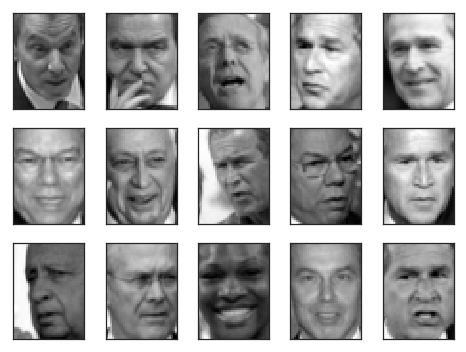

In [32]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

#### Question 4. What  **minimal** principal component number is needed to explain 90% of data variance (scaled using  StandardScaler)?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q4__*

- 75
- 76
- 77
- 78

For this task, you should be using the [`svd_solver='randomized'`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) parameter, which is a PCA approximation, but it significantly increases performance on large data sets. Use fixed `random_state=1` for comparable results.

In [33]:
lfw_people.data.shape

(1560, 1850)

In [34]:
sc = StandardScaler()
images_sc = sc.fit_transform(lfw_people.data)

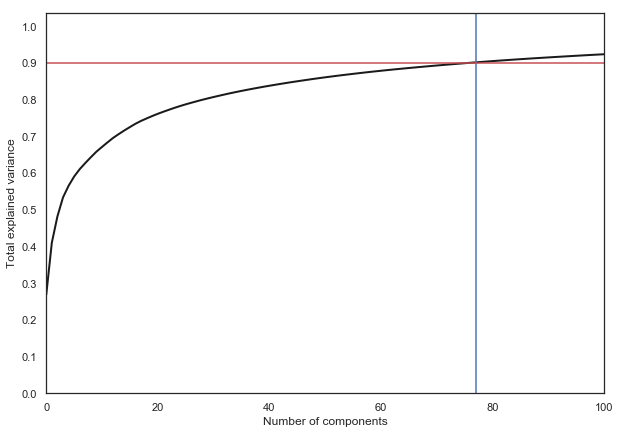

In [35]:
pca = PCA(random_state=1, svd_solver='randomized').fit(images_sc)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(77, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [40]:
pca = PCA(0.9, random_state=1).fit(images_sc)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 77 components to explain 90% of variance


In [ ]:
# answer (3)  77

Print a picture showing the first 30 principal components (don't be scared when you see the results). In order to create it, use 30 vectors from `pca.components_`, reshape them to their initial size (50 x 37), and display.

In [41]:
pca.components_[0]

array([-0.00472254, -0.00617152, -0.00869314, ..., -0.00356853,
       -0.00303213, -0.00245591], dtype=float32)

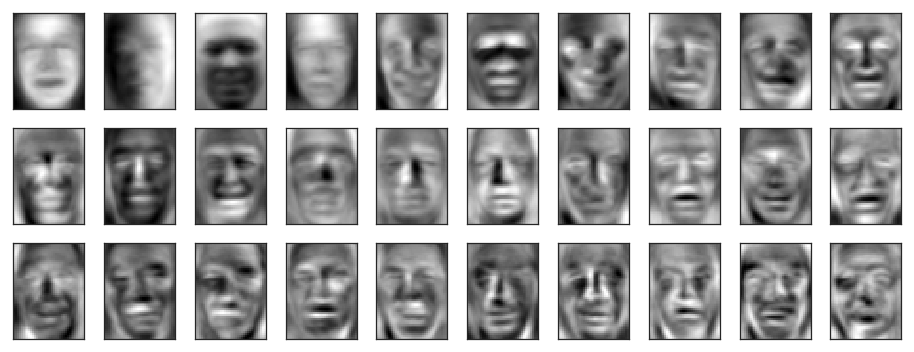

In [42]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='binary')

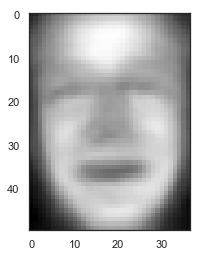

In [43]:
plt.imshow(pca.components_[0].reshape((50,37)), cmap='binary')

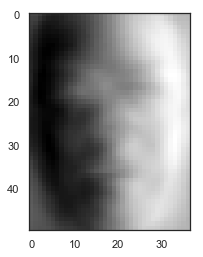

In [44]:
plt.imshow(pca.components_[1].reshape((50,37)), cmap='binary')

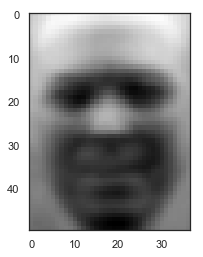

In [45]:
plt.imshow(pca.components_[2].reshape((50,37)), cmap='binary')

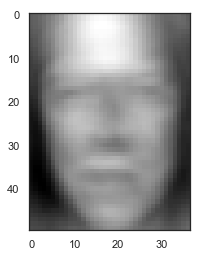

In [46]:
plt.imshow(pca.components_[3].reshape((50,37)), cmap='binary')

#### Question 5. Within the first 30 principal components, which one brightens the left side of the face? More specifically, which principal component corresponds to a linear combination of the initial features (pixels' intensity), which, when shown as an image, looks like a photo highlighted from the left side?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q5__*

- 1
- 2
- 4
- 5

In [ ]:
# answer (2)  2nd principal component

Now let's create a projection of faces onto the space of the first two principal components. 

#### Question 6. Who looks the least similar to the other people in the dataset if we only consider the two first principal components? 

To answer this question, take the first two principal components from the rescaled data, evaluate two mean principal components' values for each person over all their images in the dataset (again, use both svd_solver='randomized' and random_state=1). Then, with 12 two-dimensional points, find the one which has the largest distance from the others (by Euclidean distance). You can do this either precisely or approximately using `sklearn.metrics.euclidean_distances` and `seaborn.heatmap`.

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q6__*

- Colin Powell
- George W Bush
- Jacques Chirac
- Serena Williams

In [47]:
pca = PCA(n_components=2 , svd_solver='randomized', random_state=1).fit(images_sc)

In [48]:
pca.components_.shape

(2, 1850)

In [49]:
pca.components_[0].shape

(1850,)

In [50]:
pca.components_[1]

array([ 0.01641824,  0.01664823,  0.01924726, ..., -0.01666304,
       -0.01587059, -0.01555001], dtype=float32)

In [51]:
lfw_people.target

array([11,  4,  2, ...,  3, 11,  5])

In [52]:
lfw_people.target.shape

(1560,)

In [53]:
images_sc.shape

(1560, 1850)

In [54]:
pca.components_[0].shape

(1850,)

In [55]:
images_sc_pcaT = pca.transform(images_sc)

In [56]:
images_sc_pcaT.shape

(1560, 2)

In [57]:
my_array = np.zeros((12,2))
for i in range(12):
    my_array[i,0] = np.mean(images_sc_pcaT[lfw_people.target==i], axis=0)[0]
    my_array[i,1] = np.mean(images_sc_pcaT[lfw_people.target==i], axis=0)[1]

In [58]:
my_array

array([[ 3.29261446e+00, -3.11940223e-01],
       [ 5.69912958e+00,  6.87791944e-01],
       [-1.20669830e+00,  5.75675130e-01],
       [-4.00915623e+00,  4.90768790e-01],
       [-5.00496292e+00, -1.11670673e+00],
       [ 1.03681698e+01, -1.70555070e-01],
       [-7.84659052e+00, -4.22275496e+00],
       [-1.07463064e+01,  3.84976363e+00],
       [-1.65387280e-02, -1.18168366e+00],
       [-5.20660162e+00, -3.34067917e+00],
       [ 5.05136948e+01, -2.29326487e+00],
       [-5.78217363e+00,  3.88422072e-01]])

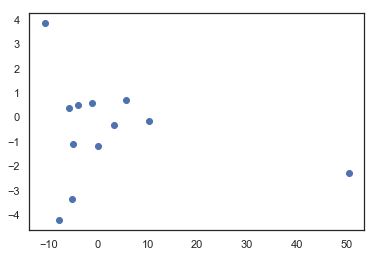

In [59]:
plt.scatter(my_array[:,0], my_array[:,1])

In [60]:
from scipy.spatial import distance

In [61]:
import seaborn as sns

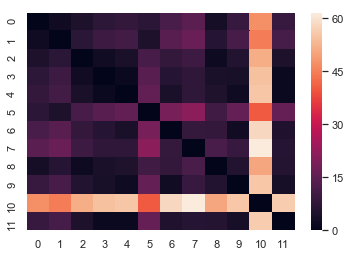

In [62]:
sns.heatmap(metrics.euclidean_distances(my_array))

In [63]:
lfw_people.target_names[10]

'Serena Williams'

In [ ]:
# Answer (4) : Serena Williams

## 2. Clustering

For the next question, load the housing prices dataset:

In [64]:
boston = datasets.load_boston()
X = boston.data

In [65]:
X[:4,:]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00]])

Using the elbow-method (reference [article 7](https://medium.com/@libfun/db7879568417) of the course), find the optimal number of clusters to set as a hyperparameter for the k-means algorithm.

#### Question 7.  What is the optimal number of clusters to use on housing prices data set according to the elbow-method? Use `random_state=1` in the k-means method, and don't rescale the data.

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q7__*

- 2
- 3
- 4
- 5

In this case, we are looking for the most significant curve fracture on the `Cluster number vs Centroid distances` graph. Consider the number of clusters from 2 to 10. Use `random_state=1` for the k-means algorithm initialization.

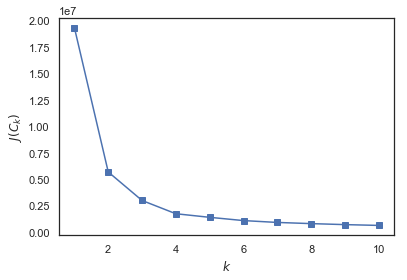

In [66]:
from sklearn.cluster import KMeans
inertia = []
inertia_dict = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(kmeans.inertia_)
    inertia_dict[k] = kmeans.inertia_
plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [67]:
inertia_dict

{1: 19358306.30802525,
 2: 5729773.027944945,
 3: 3034096.549952508,
 4: 1780906.996415951,
 5: 1442381.0398573545,
 6: 1134349.6812535997,
 7: 958856.0592933868,
 8: 847828.5434954002,
 9: 753060.3224731192,
 10: 677597.1343308276}

In [68]:
D_k = {}
for k in range(2,10):
    numerator = inertia_dict[k] - inertia_dict[k+1]
    denominator = inertia_dict[k-1] - inertia_dict[k]
    rel = abs(numerator / denominator)
    D_k[k] = rel

In [69]:
D_k

{2: 0.19779652165009448,
 3: 0.4648887074423153,
 4: 0.2701314861772197,
 5: 0.909919468909134,
 6: 0.5697264809521044,
 7: 0.6326584097919988,
 8: 0.8535561688573743,
 9: 0.7962921254430791}

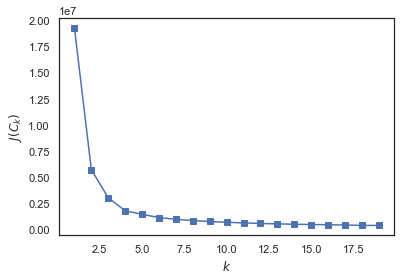

In [73]:
from sklearn.cluster import KMeans
inertia = []
inertia_dict = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(kmeans.inertia_)
    inertia_dict[k] = kmeans.inertia_
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [74]:
D_k = {}
for k in range(2,19):
    numerator = inertia_dict[k] - inertia_dict[k+1]
    denominator = inertia_dict[k-1] - inertia_dict[k]
    rel = abs(numerator / denominator)
    D_k[k] = rel

In [75]:
D_k

{2: 0.19779652165009448,
 3: 0.4648887074423153,
 4: 0.2701314861772197,
 5: 0.909919468909134,
 6: 0.5697264809521044,
 7: 0.6326584097919988,
 8: 0.8535561688573743,
 9: 0.7962921254430791,
 10: 0.7596327868840762,
 11: 0.9940608047290792,
 12: 0.6745486196475343,
 13: 0.993355062655456,
 14: 0.5872489057979039,
 15: 1.0493958235595753,
 16: 1.0840873192456688,
 17: 1.509861153100373,
 18: 0.006588117556766649}

In [ ]:
# answer: (1)  k=2.   для этого k минимальное D(k)

Go back to the faces dataset. Imagine that we did not know the names for who was each photo but that we knew that there were 12 different people. Let's compare clustering results from 4 algorithms - k-means, Agglomerative clustering, Affinity Propagation, and Spectral clustering. Use the same respective parameters as in the end of [this article](https://medium.com/@libfun/db7879568417), only change the number of clusters to 12.

In [80]:
images_sc

array([[-0.19662578, -0.11113536,  0.13397408, ..., -0.11303941,
         0.41069832,  0.21242179],
       [-1.131268  , -0.5958566 , -0.49243486, ..., -0.7073088 ,
        -0.33984503,  0.09282092],
       [-0.20365322, -0.8529057 , -1.0806481 , ...,  0.6603846 ,
        -0.31381464, -0.32578197],
       ...,
       [-0.8853096 , -0.68398774, -0.41604346, ...,  0.996846  ,
         0.8445384 ,  0.75062543],
       [ 0.9628928 ,  1.3650614 ,  1.4555441 , ...,  1.4643962 ,
         1.4822834 ,  1.5152166 ],
       [-1.31398   , -1.535922  , -1.6841395 , ..., -1.126793  ,
        -1.0296508 , -0.5991553 ]], dtype=float32)

In [81]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


#data = datasets.load_digits()
#X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=12, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=12, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=12))

data = []
for algo in algorithms:
    algo.fit(images_sc)
    data.append(({
        'ARI': metrics.adjusted_rand_score(lfw_people.target, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(lfw_people.target, algo.labels_),
        'Homogenity': metrics.homogeneity_score(lfw_people.target, algo.labels_),
        'Completeness': metrics.completeness_score(lfw_people.target, algo.labels_),
        'V-measure': metrics.v_measure_score(lfw_people.target, algo.labels_),
        'Silhouette': metrics.silhouette_score(images_sc, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.027093,0.068304,0.095802,0.083819,0.089410,0.044945
Affinity,0.014616,0.086747,0.305615,0.154552,0.205288,0.019190
Spectral,0.011699,0.067703,0.086099,0.094563,0.090133,-0.050495
Agglomerative,0.027382,0.073197,0.099838,0.089044,0.094132,0.025744


In [88]:
lfw_people.target

array([11,  4,  2, ...,  3, 11,  5])

In [89]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [90]:
images_sc

array([[-0.19662578, -0.11113536,  0.13397408, ..., -0.11303941,
         0.41069832,  0.21242179],
       [-1.131268  , -0.5958566 , -0.49243486, ..., -0.7073088 ,
        -0.33984503,  0.09282092],
       [-0.20365322, -0.8529057 , -1.0806481 , ...,  0.6603846 ,
        -0.31381464, -0.32578197],
       ...,
       [-0.8853096 , -0.68398774, -0.41604346, ...,  0.996846  ,
         0.8445384 ,  0.75062543],
       [ 0.9628928 ,  1.3650614 ,  1.4555441 , ...,  1.4643962 ,
         1.4822834 ,  1.5152166 ],
       [-1.31398   , -1.535922  , -1.6841395 , ..., -1.126793  ,
        -1.0296508 , -0.5991553 ]], dtype=float32)

In [93]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


#data = datasets.load_digits()
#X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

data = []
for algo in algorithms:
    algo.fit(images_sc)
    data.append(({
        'ARI': metrics.adjusted_rand_score(lfw_people.target, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(lfw_people.target, algo.labels_),
        'Homogenity': metrics.homogeneity_score(lfw_people.target, algo.labels_),
        'Completeness': metrics.completeness_score(lfw_people.target, algo.labels_),
        'V-measure': metrics.v_measure_score(lfw_people.target, algo.labels_),
        'Silhouette': metrics.silhouette_score(images_sc, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.019839,0.021000,0.022631,0.070719,0.034289,0.145569
Affinity,0.014616,0.086747,0.305615,0.154552,0.205288,0.019190
Spectral,0.024648,0.025685,0.027319,0.119807,0.044493,0.142323
Agglomerative,0.010276,0.017469,0.019106,0.059669,0.028944,0.119324


#### Question 8. </font> Select all of the correct statements:

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q8__*

- Agglomerative clustering worked better than others by all metrics
- Clustering results are disappointing - there isn't a metric that exceeds 0.35
- Affinity Propagation worked better than Spectral clustering by all metrics
- Considering only 2 clusters (whether it is Serena Williams or not) and comparing clustering results with a binary vector, we can see that clustering algorithms work better, with some metrics exceeding 66%

In [ ]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


#data = datasets.load_digits()
#X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

data = []
for algo in algorithms:
    algo.fit(images_sc)
    data.append(({
        'ARI': metrics.adjusted_rand_score(lfw_people.target, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(lfw_people.target, algo.labels_),
        'Homogenity': metrics.homogeneity_score(lfw_people.target, algo.labels_),
        'Completeness': metrics.completeness_score(lfw_people.target, algo.labels_),
        'V-measure': metrics.v_measure_score(lfw_people.target, algo.labels_),
        'Silhouette': metrics.silhouette_score(images_sc, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

In [83]:
df_target = pd.DataFrame(lfw_people.target, columns={'init_target'})

In [84]:
df_target['SW'] = df_target['init_target'].apply(lambda x: 1 if x == 10 else 0)

In [85]:
y_vec = df_target['SW'].values

In [95]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


#data = datasets.load_digits()
#X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

data = []
for algo in algorithms:
    algo.fit(lfw_people.data)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y_vec, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y_vec, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y_vec, algo.labels_),
        'Completeness': metrics.completeness_score(y_vec, algo.labels_),
        'V-measure': metrics.v_measure_score(y_vec, algo.labels_),
        'Silhouette': metrics.silhouette_score(lfw_people.data, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.027111,0.042255,0.199435,0.042710,0.070353,0.119407
Affinity,0.001505,0.016969,0.672058,0.023132,0.044724,0.020654
Spectral,0.171740,0.080125,0.269952,0.080740,0.124302,0.111273
Agglomerative,0.015702,0.033423,0.159867,0.033877,0.055907,0.091115


Use the coordinates of the 12 "average" people's images you got before. Draw a dendrogram for them. Use `scipy.cluster.hierarchy` and `scipy.spatial.distance.pdist`, take parameters values from the appropriate example in the [article](https://medium.com/@libfun/db7879568417).

In [96]:
my_array

array([[ 3.29261446e+00, -3.11940223e-01],
       [ 5.69912958e+00,  6.87791944e-01],
       [-1.20669830e+00,  5.75675130e-01],
       [-4.00915623e+00,  4.90768790e-01],
       [-5.00496292e+00, -1.11670673e+00],
       [ 1.03681698e+01, -1.70555070e-01],
       [-7.84659052e+00, -4.22275496e+00],
       [-1.07463064e+01,  3.84976363e+00],
       [-1.65387280e-02, -1.18168366e+00],
       [-5.20660162e+00, -3.34067917e+00],
       [ 5.05136948e+01, -2.29326487e+00],
       [-5.78217363e+00,  3.88422072e-01]])

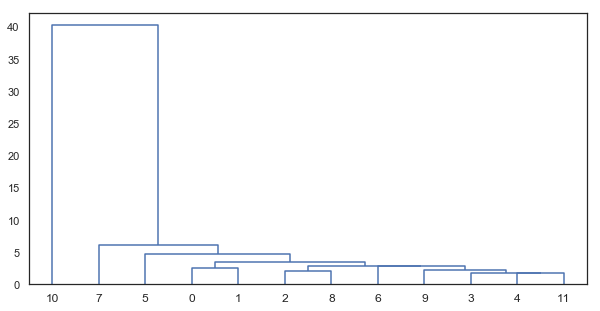

In [97]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(my_array) 
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question 9. Look at the dendrogram and consider a step when just two clusters are left: Serena Williams vs. all.  Who was the last person added to the "big" cluster?  

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a7_q9__*

- Gerhard Schroeder
- Jean Chretien 
- John Ashcroft
- Junichiro Koizumi

In [98]:
lfw_people.target_names[10]

'Serena Williams'

In [99]:
lfw_people.target_names[7]

'Jean Chretien'

In [100]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [ ]:
# Answer (2)    Jean Chretien